In [1]:
import multiprocessing as mp
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore", message="No frequency information was provided")
warnings.filterwarnings("ignore", message="Non-stationary starting autoregressive parameters found")
warnings.filterwarnings("ignore", message="Non-invertible starting MA parameters found")
warnings.filterwarnings("ignore", message="Maximum Likelihood optimization failed to converge")
warnings.filterwarnings("ignore", message="No supported index is available")

data = pd.read_csv('./input/Demand_History.csv', index_col=0, parse_dates=True,)

forecast_df = pd.DataFrame(index=data.index, columns=['2019', '2020'])
# Define a function to fit the ARIMA model to a single demand point index
def fit_arima(demand_point_index):
    train = data.loc[demand_point_index, '2010':]
    model = ARIMA(train, order=(2, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=2)
    forecast_df.loc[demand_point_index, :] = forecast
    return (demand_point_index, forecast)


# Create a pool of worker processes
pool = mp.Pool()

# Fit the ARIMA models in parallel
results = pool.map(fit_arima, data.index)
print("TASK COMPLETED")
forecast_df.to_csv('forecasts.csv', header=['2019', '2020'])


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

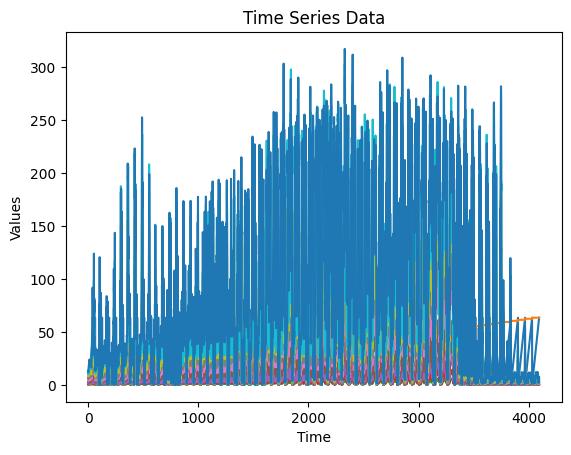

In [37]:
data = pd.read_csv('./input/Demand_History.csv', index_col=0, parse_dates=True)
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

In [40]:
# TEST FOR STATIONARITY [ADF TEST]
data = data.iloc[0]
def adf_test(data):
    adf_result = adfuller(data)
    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    if adf_result[0] < adf_result[4]['5%'] and adf_result[1] < 0.05:
        print('The time series is stationary')
    else:
        print('The time series is non-stationary')
        
adf_test(data)

ADF Statistic: 3.740775
p-value: 1.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
The time series is non-stationary


In [41]:
# FINDING THE VALUE OF d
def find_d(data):
    d = 0
    while not adf_test(data)[1] < 0.05:
        data = data.diff().dropna()
        d += 1
    return d

d = find_d(data)
print('The value of d is:', d)


ADF Statistic: 3.740775
p-value: 1.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
The time series is non-stationary


TypeError: 'NoneType' object is not subscriptable

ValueError: could not broadcast input array from shape (11,) into shape (21,)

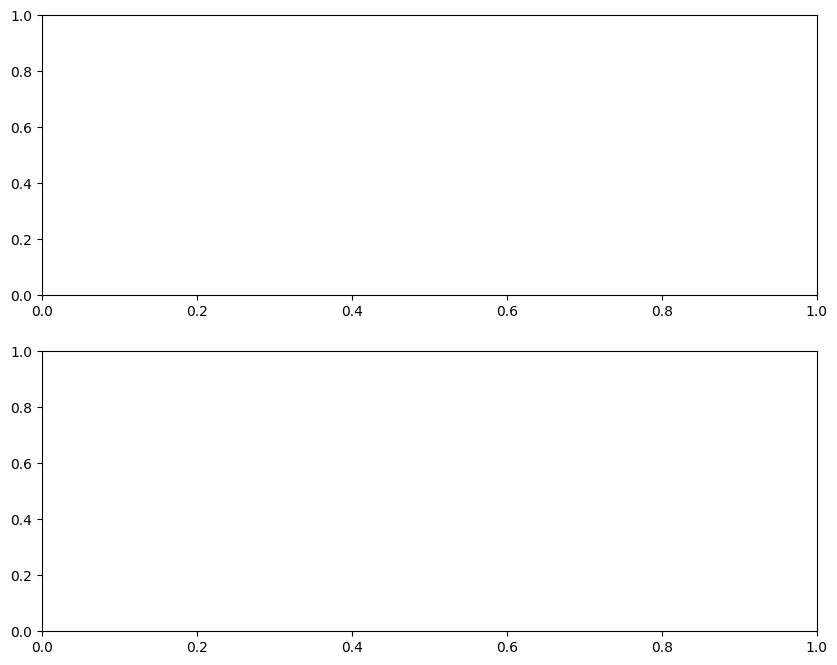

In [42]:
# find the value of p and q

def plot_acf_pacf(data):
    fig, ax = plt.subplots(2, figsize=(10, 8))
    plot_acf(data, ax=ax[0], lags=20)
    plot_pacf(data, ax=ax[1], lags=20)
    plt.show()

plot_acf_pacf(data)


In [46]:
# FITTING THE MODEL
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(1, 1, 1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -10.859
Date:                Thu, 02 Mar 2023   AIC                             27.718
Time:                        18:45:49   BIC                             28.626
Sample:                             0   HQIC                            26.722
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9492      0.290      3.276      0.001       0.381       1.517
ma.L1         -0.1901      2.367     -0.080      0.936      -4.829       4.449
sigma2         0.4226      0.205      2.066      0.0

/home/rohit/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rohit/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rohit/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rohit/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
